In [1]:
import h5py as hdf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import glob

In [40]:
#specData = hdf.File("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/N2-12832-Eps084restart00619883.h5","r")
specData = hdf.File("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00590883.h5","r")

In [2]:
def spec(path):
    specData = hdf.File(path,"r")
    
    u = specData['u']
    v = specData['v']
    w = specData['w']
    fx = specData['fx']
    fz = specData['fz']

    Nx = specData['nx'][0]
    Ny = specData['ny'][0]
    Nz = specData['nz'][0]

    Lx = specData['LMFx'][0]
    Ly = specData['LMFy'][0]
    Lz = specData['LMFz'][0]
    
    nu = specData['nu'][0]

    forceVar = np.zeros(128)
    powerSpec = np.zeros(128)
    energySpec = np.zeros(128)
    diss = 0.0
    
    yBoxScale = Ly

    print("Analyzing dataset...")

    weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
    weights = np.fromfunction(np.vectorize(weightsFxn), (int(Nz), int(Nx/2), int(Ny)), dtype=float)
        
    ksqFxn = lambda k, j, i: j*j + \
                             ((i/yBoxScale) % (Nx/2) - np.floor(2*i/(Nx*yBoxScale))*Nx/2)**2 + \
                             (k % (Nz/2) - np.floor(2*k/Nz)*Nz/2)**2
    ksq = np.fromfunction(np.vectorize(ksqFxn), (int(Nz), int(Nx/2), int(Ny)), dtype=float)
    
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))
    tmp = eneU + eneV + eneW
    ene = np.multiply(tmp, weights)
    
    diss = np.multiply(ene, ksq)
    diss = 2 * nu * diss
        
    for iy in range(0,int(Ny)):
        ky = iy * 1.0/Ly
        if (iy > Ny/2): ky = (iy - Ny) * 1.0/Ly

        for ix in range(0,int(Nx/2)):
            weight = 2
            kx = ix * 1.0/Lx
            if (ix == 0): weight = 1

            for iz in range(0,int(Nz)):
                kz = iz * 1.0/Lz
                if (iz > Nz/2): kz = (iz - Nz) * 1.0/Lz

                #if (ky != 0): continue

                ksquared = kx*kx + ky*ky + kz*kz
                kh_mag = np.sqrt(kx*kx + kz*kz)

                fxhat = fx[iz][ix][iy]
                fzhat = fz[iz][ix][iy]
                uhat = u[iz][ix][iy]
                vhat = v[iz][ix][iy]
                what = w[iz][ix][iy]

                fVar = 0.5 * (fxhat[0] * fxhat[0] + fxhat[1] * fxhat[1] + fzhat[0] * fzhat[0] + fzhat[1] * fzhat[1])
                power = uhat[0] * fxhat[0] + uhat[1] * fxhat[1] + what[0] * fzhat[0] + what[1] * fzhat[1]
                ene = 0.5 * (uhat[0] * uhat[0] + uhat[1] * uhat[1] + vhat[0] * vhat[0] + vhat[1] * vhat[1] + 
                      what[0] * what[0] + what[1] * what[1])
                diss = diss + 2 * ene * ksquared * nu * weight
                
                binH = int(kh_mag + 0.5)
                #print(kx, ky, kz, ksquared, ksq[iz][ix][iy], weight, weights[iz][ix][iy])

                forceVar[binH] = forceVar[binH] + fVar * weight
                powerSpec[binH] = powerSpec[binH] + power * weight
                energySpec[binH] = energySpec[binH] + ene * weight
                
                if (diss != )

    print("Generating Plots...")

    f, powPlot = plt.subplots()
    powPlot.plot(powerSpec)
    powPlot.set_xlim(-0.1,6)
    plt.show()
    
    f, enePlot = plt.subplots()
    enePlot.plot(energySpec)
    enePlot.set_yscale('log')
    enePlot.set_xlim(0,Nx)
    plt.show()
    
    print (specData['time'][0], diss)
    return [forceVar, powerSpec, energySpec]

SyntaxError: invalid syntax (<ipython-input-2-6950065043ef>, line 83)

Analyzing dataset...
Generating Plots...


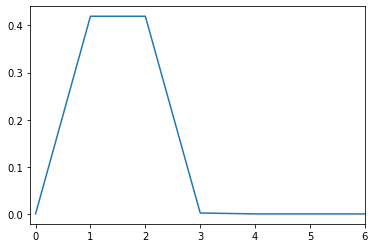

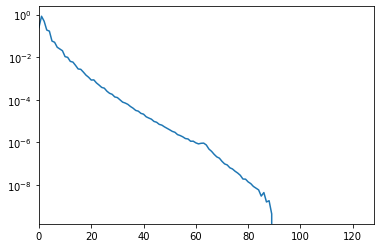

138.30878542537403 0.5918569409942076


In [318]:
plts = spec("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/N2-128128-Eps084restart00590883.h5")

Analyzing dataset...
Generating Plots...


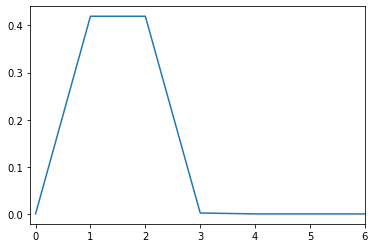

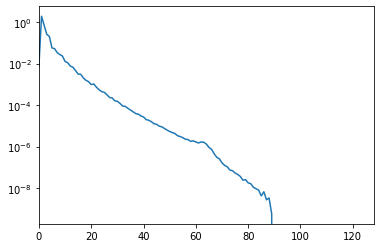

214.01461959777544 0.6788668670140549


In [319]:
plts = spec("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/N2-12832-Eps084restart00636883.h5")

In [3]:
import os
import sys
import glob

print ("Generating file list...")
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/*.h5") 
fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084-0330/*.h5") 
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/*.h5") 

summaryData = []

first = True
for file in fileList:
    specData = hdf.File(file,"r")
    u = specData.get('u')[()]
    v = specData.get('v')[()]
    w = specData.get('w')[()]
    r = specData.get('rho')[()]

    nx = specData.get('nx')[()]
    ny = specData.get('ny')[()]
    nz = specData.get('nz')[()]
    
    time = specData.get('time')[()]

    yBoxScale = specData.get('LMFy')[()]
        
    nu = specData.get('nu')[()]
    diff = specData.get('diff')[()]
    grav = specData.get('grav')[()]
    gradv = specData.get('gradv')[()]
    
    if (first):
        print ("Calculating work arrays...")
        weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
        weights = np.fromfunction(np.vectorize(weightsFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        
        ksqFxn = lambda k, j, i: j*j + \
                                 ((i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2)**2 + \
                                 (k % (nz/2) - np.floor(2*k/nz)*nz/2)**2
        ksq = np.fromfunction(np.vectorize(ksqFxn), (int(nz), int(nx/2), int(ny)), dtype=float)
        first = False
        
    # Kinetic Energy/Diss Calculations
    eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
    eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
    eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))

    tmp = eneU + eneV + eneW
    ke = np.multiply(tmp, weights)
    
    keDiss = np.multiply(ke, ksq)
    keDiss = 2 * nu * keDiss
    
    # Potential Energy/Diss Calculations
    eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))
    
    pe = np.multiply(eneR, weights) 
    pe = -grav / gradv * pe
    
    peDiss = np.multiply(pe, ksq)
    peDiss = 2 * diff * peDiss
    
    summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])
    
    print (time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss))

summaryData = np.asarray(summaryData, dtype=np.float32)

Generating file list...
Calculating work arrays...
[540.49847297] 3.746261847837725 0.6450602841509444 0.13244534459974228 0.15745044152377763
[464.38044296] 3.303831078466529 0.8528047888098329 0.18228361406852883 0.2536092715887993
[383.13434361] 3.3964677654285755 0.5829209975706497 0.17559221738944536 0.19512428749981436
[320.68138269] 3.1835902873233977 0.43193433865782016 0.15110618971931866 0.15123351518012013
[759.7917791] 3.0197363931091106 0.5855944268202777 0.16089270025495356 0.21681905471048177
[141.83633112] 3.288059010855148 0.6032372085224944 0.13188782880947417 0.14385333068897224
[693.11275423] 2.9649725661990898 0.6736650345926396 0.1457947045209881 0.189066611419633
[756.15468236] 2.895718381175697 0.5804825958523921 0.14874188640888936 0.19165565197594492
[170.23858516] 3.4966713183380205 0.6112913895906815 0.0955646846555326 0.12122169772428454
[249.92514368] 3.355619065520438 0.5151147761433885 0.16007035005749232 0.1726606637890709
[830.61783656] 3.4199134492900

[517.2630874] 3.104012231640567 0.5316496000786227 0.13913984789687284 0.17664256249995647
[582.83350167] 2.5018874007166314 0.8063319056310896 0.15414532649476748 0.1951040475196073
[447.98360761] 3.522626552978226 0.5475598132098236 0.1300271416923985 0.15232541460892873
[497.92991878] 3.4534277180911563 0.6945708615489383 0.14829913170955644 0.18885066425537042
[304.12172481] 3.067786549678343 0.7487587287507982 0.14869936356666585 0.19944518273891598
[102.97013689] 2.9273220686934183 0.5015779829176991 0.1154286185998313 0.1600006838730264
[129.99968547] 3.4279482555392646 0.5662210718700642 0.1621522115115047 0.17342908546229607
[201.60315206] 3.4545908363995217 0.7192120998794449 0.18934156534814167 0.2780300600438382
[281.30867465] 3.740396676336145 0.509023029579458 0.1396530181894507 0.16451638262195656
[501.51072917] 3.0762179553506566 0.5001138541399304 0.10781597936283954 0.144996960199919
[948.7881467] 3.3158116452229693 0.6621325547031951 0.17907266774348263 0.20523355405

[800.25011522] 2.884548081167374 0.5413247573090407 0.14411072776376643 0.17085574076366758
[862.35015428] 2.9703678539118568 0.6786186752788073 0.16123034210425863 0.2086551577476354
[657.19408558] 3.214680157493385 0.4802872750423467 0.14269719530775893 0.16296514058875342
[356.52402692] 3.5208392170395477 0.43792282536098487 0.08379422046996343 0.10340723729686196
[419.46443652] 3.9782842909411986 0.5407412417921038 0.12231255577644226 0.14347350641556267
[647.88163155] 3.0123044038283107 0.4765017224020454 0.1102274308854524 0.13883188452327008
[877.02552438] 3.3981538735058305 0.5939459807004339 0.18015048717621343 0.19058174093639066
[940.23086848] 3.31654424820337 0.39759761426248186 0.11878835309657268 0.13030853686087765
[584.79035626] 2.4362515533172413 0.6387640531261841 0.14598548636801023 0.15519471857270445
[508.3393408] 3.2265720622746326 0.775762378100552 0.19823771817445945 0.25481366763972507
[492.57731974] 2.761281096239124 0.47283259564224556 0.1311912117996311 0.17

[121.14091218] 3.2200602489455363 0.5768490023970705 0.15042574595049213 0.1988970280239309
[714.43570571] 3.4958530878184715 0.6574550683618973 0.17640072276354024 0.21609142605345028
[442.31869382] 2.98487299368686 0.6387929794605276 0.15861785526279706 0.16552025001103177
[361.52726579] 3.3779316007936773 0.9464538449805772 0.16498360768443948 0.24532080237578507
[950.56688819] 3.332343516002754 0.6253314767184033 0.14783419367266015 0.18298823908805137
[503.21188138] 3.2490504806312606 0.5675192223565988 0.14823292030334909 0.18065474816623492
[823.64802996] 3.242413112977871 0.744576341239132 0.18452864814510384 0.24202843069157126
[743.0575352] 3.0509709133527485 0.7732179543903929 0.1469122442567761 0.2144424526382716
[182.54148061] 3.1604818819178027 0.7803299950285585 0.15766756043078506 0.20677773068355923
[680.6638993] 3.14221509832318 0.9001367462273033 0.20162449065461385 0.26758675865922427
[916.84015499] 2.607746017061022 0.5322107498586166 0.18805672557528438 0.20800977

[535.27926003] 3.4310582105196596 0.7830851057264957 0.13977759966651992 0.17640357371383414
[601.25666116] 3.0618503759275653 0.570155334012871 0.158243488408605 0.1824763701208764
[963.45395522] 3.0476305638892676 0.4338390371407861 0.10843244652544062 0.12767838290139769
[882.19353176] 2.70956729526166 0.48897335254996555 0.12939542415389987 0.16308889037280078
[466.3540955] 3.1117677377066566 0.4634607853222038 0.11801906671446255 0.1519494264398313
[858.7286643] 3.2543891516656194 0.6976707708721631 0.1764657676219241 0.24494577862947917
[156.23817114] 3.5354872063572356 0.6669333629656086 0.14982719454374752 0.1760387529416453
[221.17326527] 3.290357171717017 0.49102090273640275 0.10966315339351665 0.14035268927374767
[359.96906642] 3.950210230295446 0.6731847163980331 0.14550111774810406 0.17872659312348887
[562.94234313] 2.9974225131628813 0.5463769699632501 0.15601177563558305 0.19710884865256714
[644.33232813] 3.2291951218071975 0.6750928802771303 0.1594292060883305 0.2112775

[324.20051565] 2.9314644744219667 0.5666199361757338 0.16085511662985336 0.20664237380406345
[752.38007089] 2.9036235870046934 0.43689708016320994 0.11484489265145065 0.12933614625778853
[814.71331247] 3.163937527297148 0.5236861645705305 0.1376792206380738 0.17680488798864583
[253.35982901] 3.2808091305212823 0.726588229193944 0.1519302982535386 0.23005951620128035
[327.83953831] 2.8402115364938054 0.6907335426010355 0.15197189444098425 0.20798915143803715
[404.99237907] 3.3861213892353232 0.5118884222374096 0.16623288191160876 0.19185013653527733
[672.16028949] 3.4938015181897413 0.3426746971214696 0.07879000087105736 0.09022660454289443
[215.48277415] 3.4640877963991015 0.6887947790735437 0.1079118938937321 0.14843116780779594
[115.4998225] 2.8904554552250854 0.5673264431404568 0.13099826146450352 0.19664618576515897
[709.22122977] 3.1900341552277798 0.6048272314330222 0.17123301211111774 0.2097150354886847
[785.8698462] 3.3185589634327393 0.7591360029556168 0.23878391459495504 0.29

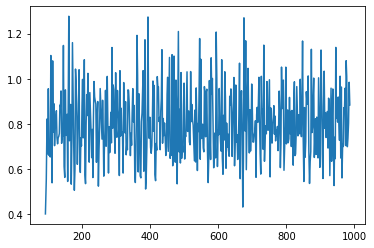

In [395]:
plt.plot(sData['times'][1:], sData['keDiss'][1:] + sData['peDiss'][1:])
plt.show()

In [398]:
import pandas as pd 
sData = pd.DataFrame(summaryData,columns=['times','ke','keDiss','pe','peDiss']) 

sData = sData.sort_values(by=['times'])

(sData['keDiss'][10:].sum() + sData['peDiss'][10:].sum())/(len(sData)-10)

sData = sData.to_numpy()

%store sData

Stored 'sData' (ndarray)


In [4]:
def spectra(fileList):
    print ("Generating file list...")
    summaryData = []
    fileCnt = 0
    first = True

    for file in fileList:
        specData = hdf.File(file,"r")
        u = specData.get('u')[()]
        v = specData.get('v')[()]
        w = specData.get('w')[()]
        r = specData.get('rho')[()]

        nx = specData.get('nx')[()]
        ny = specData.get('ny')[()]
        nz = specData.get('nz')[()]

        time = specData.get('time')[()]

        yBoxScale = specData.get('LMFy')[()]

        nu = specData.get('nu')[()]
        diff = specData.get('diff')[()]
        grav = specData.get('grav')[()]
        gradv = specData.get('gradv')[()]

        if (first):
            print ("Calculating work arrays...")
            weightsFxn = lambda k, j, i: 1.0 + np.ceil(j/1000)
            weights = np.fromfunction(np.vectorize(weightsFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

            ksqFxn = lambda k, j, i: j*j + \
                                     ((i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2)**2 + \
                                     (k % (nz/2) - np.floor(2*k/nz)*nz/2)**2
            ksq = np.fromfunction(np.vectorize(ksqFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

            kxFxn = lambda k, j, i: j
            kx = np.fromfunction(np.vectorize(kxFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

            kyFxn = lambda k, j, i: (i/yBoxScale) % (nx/2) - np.floor(2*i/(nx*yBoxScale))*nx/2
            ky = np.fromfunction(np.vectorize(kyFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

            kzFxn = lambda k, j, i: k % (nz/2) - np.floor(2*k/nz)*nz/2
            kz = np.fromfunction(np.vectorize(kzFxn), (int(nz), int(nx/2), int(ny)), dtype=float)

        # Kinetic Energy/Diss Calculations
        eneU = 0.5*(np.multiply(u[:,:,:,0],u[:,:,:,0]) + np.multiply(u[:,:,:,1],u[:,:,:,1]))
        eneV = 0.5*(np.multiply(v[:,:,:,0],v[:,:,:,0]) + np.multiply(v[:,:,:,1],v[:,:,:,1]))
        eneW = 0.5*(np.multiply(w[:,:,:,0],w[:,:,:,0]) + np.multiply(w[:,:,:,1],w[:,:,:,1]))

        tmp = eneU + eneV + eneW
        ke = np.multiply(tmp, weights)

        keDiss = np.multiply(ke, ksq)
        keDiss = 2 * nu * keDiss

        # Potential Energy/Diss Calculations
        eneR = 0.5*(np.multiply(r[:,:,:,0],r[:,:,:,0]) + np.multiply(r[:,:,:,1],r[:,:,:,1]))

        pe = np.multiply(eneR, weights) 
        pe = -grav / gradv * pe

        peDiss = np.multiply(pe, ksq)
        peDiss = 2 * diff * peDiss

        summaryData.append([time, np.sum(ke), np.sum(keDiss), np.sum(pe), np.sum(peDiss)])

        stratData = pd.DataFrame(np.transpose([kx.flatten(), ky.flatten(), kz.flatten(), weights.flatten(), 
                                  ksq.flatten(), eneU.flatten(), eneV.flatten(), eneW.flatten(), 
                                  eneR.flatten()]), columns=['kx','ky','kz','weight','ksq','eneU','eneV','eneW','eneR'])

        stratData['keSpec'] = (stratData['eneU'] + stratData['eneV'] + stratData['eneW']) * stratData['weight']
        stratData['peSpec'] = -(stratData['eneR'] * grav / gradv) * stratData['weight']
        stratData['keDissSpec'] = (2 * nu * stratData['keSpec']) * stratData['ksq'] 
        stratData['peDissSpec'] = (2 * diff * stratData['peSpec']) * stratData['ksq']
        stratData['kxAbs'] = np.abs(stratData['kx'])
        stratData['kyAbs'] = np.abs(stratData['ky'])
        stratData['kzAbs'] = np.abs(stratData['kz'])

        #print ((stratData.groupby(["kxAbs"]).sum()).iloc[0]['keSpec'])
        
        if (first):
            kxBin = stratData.groupby(["kxAbs"]).sum()
            kyBin = stratData.groupby(["kyAbs"]).sum()
            kzBin = stratData.groupby(["kzAbs"]).sum()
            first = False
        else:
            kxBin = kxBin.add(stratData.groupby(["kxAbs"]).sum())#.reset_index()
            kyBin = kyBin.add(stratData.groupby(["kyAbs"]).sum())#.reset_index()
            kzBin = kzBin.add(stratData.groupby(["kzAbs"]).sum())#.reset_index()

        fileCnt = fileCnt + 1
        if (fileCnt % 8 == 1):
            print ("Done with ", fileCnt/0.8, "%")
            
        if (fileCnt == 80):
            break

    summaryData = np.asarray(summaryData, dtype=np.float32)
    
    return (summaryData, kxBin/fileCnt, kyBin/fileCnt, kzBin/fileCnt)

In [20]:
#fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-12832-Eps084/N2-12832-Eps084/*.h5") 
#fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N2-128128-Eps084/*.h5") 
fileList = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N1-12832-Eps084/*.h5") 
fileList1 = glob.glob("/Users/blmindell/Desktop/Jeremy/WorkFromHome/stratDNS/N1-128128-Eps084/*.h5") 
#fileList = glob.glob("/Users/jmelvin/Desktop/WorkFromHome/stratDNS/N2-12832-Eps084/*.h5") 

output = spectra(fileList)
output1 = spectra(fileList1)

Generating file list...
Calculating work arrays...
Done with  1.25 %
Done with  11.25 %
Generating file list...
Calculating work arrays...
Done with  1.25 %
Done with  11.25 %


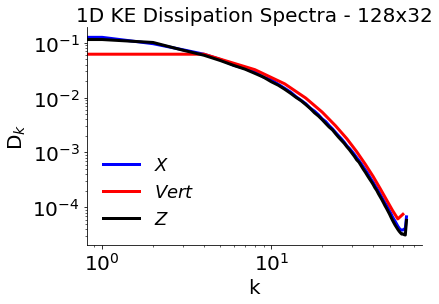

In [29]:
plt.plot(output[1]['keDissSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output[2]['keDissSpec'].iloc[0:16]/4, label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output[3]['keDissSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('D'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D KE Dissipation Spectra - 128x32',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

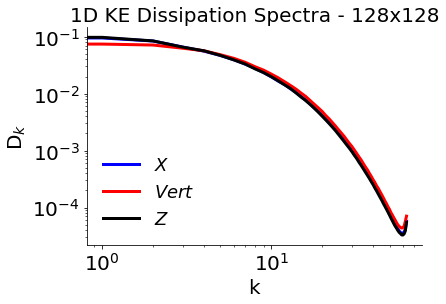

In [31]:
plt.plot(output1[1]['keDissSpec'].iloc[0:64], label=r'$X$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['keDissSpec'].iloc[0:64], label=r'$Vert$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['keDissSpec'].iloc[0:64], label=r'$Z$', linestyle="solid", linewidth=3, color='k')
plt.yscale('log')
plt.xscale('log')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=18,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('D'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D KE Dissipation Spectra - 128x128',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

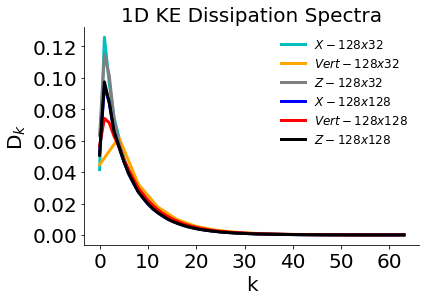

In [24]:
plt.plot(output[1]['keDissSpec'].iloc[0:64], label=r'$X - 128x32$', linestyle="solid", linewidth=3, color='c')
plt.plot(output[2]['keDissSpec'].iloc[0:16]/4, label=r'$Vert - 128x32$', linestyle="solid", linewidth=3, color='orange')
plt.plot(output[3]['keDissSpec'].iloc[0:64], label=r'$Z - 128x32$', linestyle="solid", linewidth=3, color='gray')
plt.plot(output1[1]['keDissSpec'].iloc[0:64], label=r'$X - 128x128$', linestyle="solid", linewidth=3, color='b')
plt.plot(output1[2]['keDissSpec'].iloc[0:64], label=r'$Vert - 128x128$', linestyle="solid", linewidth=3, color='r')
plt.plot(output1[3]['keDissSpec'].iloc[0:64], label=r'$Z - 128x128$', linestyle="solid", linewidth=3, color='k')
plt.yscale('linear')
plt.xscale('linear')
plt.frame = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.legend(loc="best",fontsize=12,frameon=False)
plt.xlabel('k', fontsize=20, fontweight='normal')
plt.ylabel('D'r'$_{k}$', fontsize=20, fontweight='normal')
plt.title('1D KE Dissipation Spectra',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

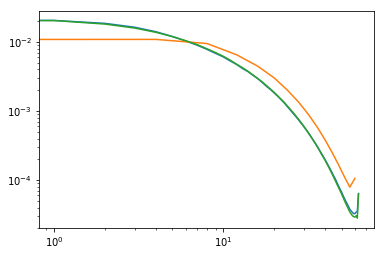

In [75]:
plt.plot(output[1]['peDissSpec'])
plt.plot(output[2]['peDissSpec'].iloc[:16]/4)
plt.plot(output[3]['peDissSpec'].iloc[:64])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [97]:
fileList = glob.glob("/Users/jmelvin/Desktop/WorkFromHome/stratDNS/N5-512128-Eps084-0413/*.h5") 

output1 = spectra(fileList)

Generating file list...
Calculating work arrays...
('Done with ', 1.25, '%')


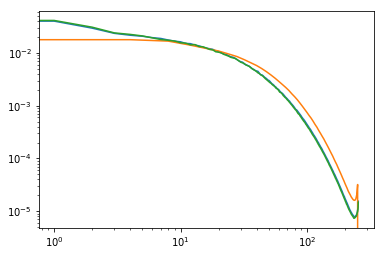

In [113]:
x = np.linspace(1,256,100)
#y = x**(1./3.)
plt.plot(output1[1]['keDissSpec'])
plt.plot(output1[2]['keDissSpec']/4)
plt.plot(output1[3]['keDissSpec'].iloc[:256])
#plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [100]:
output1[1]

,kx,ky,kz,weight,ksq,eneU,eneV,eneW,eneR,keSpec,peSpec,keDissSpec,peDissSpec,kyAbs,kzAbs
kxAbs,,,,,,,,,,,,,,,
0.0,0.0,-131072.0,-32768.0,65536.0,2.863497e+09,3.357339e-01,1.843846e-03,1.570591e-01,1.132496e-03,4.946368e-01,2.831240e-02,0.020026,0.006408,8388608.0,8388608.0
1.0,65536.0,-131072.0,-32768.0,131072.0,2.863563e+09,1.132570e-01,1.148023e-02,2.117531e-01,9.740954e-04,6.729805e-01,4.870477e-02,0.040027,0.010090,8388608.0,8388608.0
2.0,131072.0,-131072.0,-32768.0,131072.0,2.863759e+09,3.986262e-02,8.574292e-03,9.047695e-02,5.292044e-04,2.778277e-01,2.646022e-02,0.029457,0.009598,8388608.0,8388608.0
3.0,196608.0,-131072.0,-32768.0,131072.0,2.864087e+09,1.446240e-02,6.301341e-03,1.745143e-02,4.703529e-04,7.643034e-02,2.351764e-02,0.023469,0.009219,8388608.0,8388608.0
4.0,262144.0,-131072.0,-32768.0,131072.0,2.864546e+09,9.682737e-03,6.250965e-03,1.001730e-02,3.199351e-04,5.190200e-02,1.599675e-02,0.021631,0.007976,8388608.0,8388608.0
5.0,327680.0,-131072.0,-32768.0,131072.0,2.865136e+09,6.966790e-03,6.167292e-03,8.585919e-03,2.748272e-04,4.344000e-02,1.374136e-02,0.020680,0.007658,8388608.0,8388608.0
6.0,393216.0,-131072.0,-32768.0,131072.0,2.865857e+09,5.179313e-03,4.640665e-03,5.537319e-03,2.339258e-04,3.071459e-02,1.169629e-02,0.019468,0.007666,8388608.0,8388608.0
7.0,458752.0,-131072.0,-32768.0,131072.0,2.866708e+09,4.158559e-03,4.199329e-03,4.795591e-03,1.743096e-04,2.630696e-02,8.715481e-03,0.018776,0.007123,8388608.0,8388608.0
8.0,524288.0,-131072.0,-32768.0,131072.0,2.867692e+09,3.139959e-03,3.210431e-03,4.288103e-03,1.484369e-04,2.127699e-02,7.421843e-03,0.017550,0.007255,8388608.0,8388608.0
